In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset/hospital-admission-rate-by-age-and-sex.csv')
data.head()

,year,facility_type_a,sex,age,rate
0,2009,Acute,Male,0-14 Years,100.1
1,2009,Acute,Male,15-64 years,62.7
2,2009,Acute,Male,65 years & over,323.0
3,2009,Acute,Female,0-14 Years,84.9
4,2009,Acute,Female,15-64 years,73.5


In [3]:
data.shape

(198, 5)

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [5]:
X.head()

,year,facility_type_a,sex,age
0,2009,Acute,Male,0-14 Years
1,2009,Acute,Male,15-64 years
2,2009,Acute,Male,65 years & over
3,2009,Acute,Female,0-14 Years
4,2009,Acute,Female,15-64 years


In [6]:
y['rate'].unique()

array([1.001e+02, 6.270e+01, 3.230e+02, 8.490e+01, 7.350e+01, 2.877e+02,
       1.000e-01, 3.300e+00, 2.500e+00, 2.000e-01, 1.900e+00, 2.000e+00,
       0.000e+00, 6.000e-01, 1.360e+01, 4.000e-01, 1.640e+01, 1.043e+02,
       6.380e+01, 3.396e+02, 8.800e+01, 7.420e+01, 2.953e+02, 3.500e+00,
       2.900e+00, 1.800e+00, 7.000e-01, 1.490e+01, 1.690e+01, 1.116e+02,
       6.540e+01, 3.452e+02, 9.560e+01, 7.570e+01, 3.080e+02, 2.600e+00,
       1.700e+00, 5.000e-01, 1.750e+01, 1.185e+02, 6.670e+01, 3.476e+02,
       1.012e+02, 7.720e+01, 3.040e+02, 2.800e+00, 1.400e+00, 1.300e+01,
       1.600e+01, 1.202e+02, 7.000e+01, 3.437e+02, 1.020e+02, 7.830e+01,
       3.026e+02, 2.700e+00, 1.600e+00, 1.390e+01, 1.680e+01, 1.266e+02,
       7.100e+01, 1.094e+02, 8.000e+01, 2.999e+02, 3.000e+00, 1.500e+00,
       1.440e+01, 1.670e+01, 1.285e+02, 7.150e+01, 1.120e+02, 8.010e+01,
       2.929e+02, 3.200e+00, 2.300e+00, 1.560e+01, 1.800e+01, 1.421e+02,
       8.150e+01, 3.667e+02, 1.215e+02, 8.860e+01, 

In [7]:
age_list = []
for item in X['age'].unique():
    age_list.append(item)
print(age_list)

['0-14 Years', '15-64 years', '65 years & over']


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for item in X:
    if len(X[item].unique()) > 8:
        X[item+'_encoded'] = le.fit_transform(X[item])
    elif len(X[item].unique()) >= 2 & len(X[item].unique()) < 5:
        dummies = pd.get_dummies(X[item], drop_first=True)
        X = pd.concat([X, dummies], axis=1)
X.head()

,year,facility_type_a,sex,age,year_encoded,Community Hospitals,Psychiatric Hospitals,Male,15-64 years,65 years & over
0,2009,Acute,Male,0-14 Years,0,0,0,1,0,0
1,2009,Acute,Male,15-64 years,0,0,0,1,1,0
2,2009,Acute,Male,65 years & over,0,0,0,1,0,1
3,2009,Acute,Female,0-14 Years,0,0,0,0,0,0
4,2009,Acute,Female,15-64 years,0,0,0,0,1,0


In [9]:
final_X = X.iloc[:,4:]
final_X.head()

,year_encoded,Community Hospitals,Psychiatric Hospitals,Male,15-64 years,65 years & over
0,0,0,0,1,0,0
1,0,0,0,1,1,0
2,0,0,0,1,0,1
3,0,0,0,0,0,0
4,0,0,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=11)
print(len(X_train), len(X_test), len(y_train), len(y_test))

158 40 158 40


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [12]:
model.coef_

array([[   0.7652981 , -167.65935252, -168.9954022 ,    5.07289789,
         -13.77742675,   71.84752994]])

In [13]:
predicted = model.predict(X_test)
model.score

<bound method RegressorMixin.score of LinearRegression()>

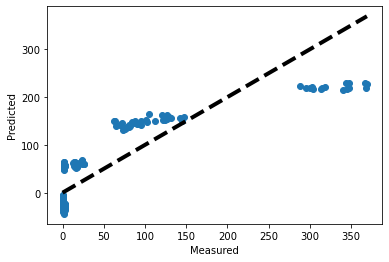

In [14]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()